# Logistic Regression Modeling

### 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler

___

### 2. Expand maximum range of rows

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Load Data

In [3]:
df = pd.read_csv('../Data/Recipes_raw.csv', index_col=0)

___

### 4. Scale DataFrame For Regression

In [4]:
cols_to_scale = ['cookingMinutes', 'num_ingredients','preparationMinutes', 
                 'pricePerServing', 'readyInMinutes', 'servings','weightWatcherSmartPoints',
                'Calories', 'Fat', 'Saturated_Fat', 'Carbohydrates', 'Sugar','Cholesterol', 
                 'Sodium', 'Protein', 'Vitamin_K', 'Vitamin_A','Vitamin_C', 'Manganese', 
                 'Folate', 'Fiber', 'Copper', 'Magnesium','Phosphorus', 'Vitamin_B6', 
                 'Potassium', 'Vitamin_B1', 'Iron','Vitamin_B2', 'Vitamin_E', 'Zinc', 
                 'Vitamin_B5', 'Vitamin_B3','Calcium', 'Selenium', 'num_words_instructions',
                 'num_steps_instructions']

In [5]:
df.drop(columns = ['analyzedInstructions', 'diets', 'extendedIngredients',
                  'dairyFree','dishTypes','glutenFree','healthScore', 'ketogenic', 
                   'lowFodmap','sustainable', 'veryHealthy', 'veryPopular',], inplace = True)

In [6]:
ss = StandardScaler()

In [7]:
df_ss = pd.DataFrame(ss.fit_transform(df[cols_to_scale].values), columns=cols_to_scale)

In [8]:
df_ss['aggregateLikes'] = df['aggregateLikes']
categorical_list = 'ingredients_list', 'ingredient_types', 'title', 'spoonacularSourceUrl'
for category in categorical_list:
    df_ss[category] = df[category]
    

In [9]:
# df_ss.to_csv('../Data/scaled_raw.csv')

In [10]:
df_ss.head(1)

,cookingMinutes,num_ingredients,preparationMinutes,pricePerServing,readyInMinutes,servings,weightWatcherSmartPoints,Calories,Fat,Saturated_Fat,Carbohydrates,Sugar,Cholesterol,Sodium,Protein,Vitamin_K,Vitamin_A,Vitamin_C,Manganese,Folate,Fiber,Copper,Magnesium,Phosphorus,Vitamin_B6,Potassium,Vitamin_B1,Iron,Vitamin_B2,Vitamin_E,Zinc,Vitamin_B5,Vitamin_B3,Calcium,Selenium,num_words_instructions,num_steps_instructions,aggregateLikes,ingredients_list,ingredient_types,title,spoonacularSourceUrl
0,-0.029409,1.485089,0.885421,-0.821052,0.268322,0.824448,-0.304844,-0.539093,-0.560448,-0.508531,-0.127736,-0.951911,-0.406466,-0.408416,-0.533227,-0.33183,-0.328877,-0.50621,-0.320724,-0.015287,-0.050056,-0.182813,0.051568,-0.264517,-0.644863,-0.724778,-0.300279,-0.21411,-0.520542,-0.436259,-0.202744,-0.394235,-0.517132,-0.779387,-0.583611,0.949967,0.805282,50078,"['ancho chile powder', 'avocado', 'black beans...","Counter({'Produce': 7, 'Spices and Seasonings'...",Kale and Quinoa Salad with Black Beans,https://spoonacular.com/kale-and-quinoa-salad-...


___

### 5. Train / Test Split Data

In [11]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [12]:
df_ss['high_likes'] = df.apply(lambda _: 0, axis=1)

In [13]:
for index, value in enumerate(df_ss.aggregateLikes):
    if value > df_ss.aggregateLikes.median():
        df_ss['high_likes'][index] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
X = df_ss[x_variables_3]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_variables_3, vif))

[('num_ingredients', 1.3240154494834417),
 ('pricePerServing', 2.0279099853642544),
 ('readyInMinutes', 1.0891540993930418),
 ('servings', 1.28811149197208),
 ('Saturated_Fat', 1.314923416311578),
 ('Sodium', 1.3464901106822431),
 ('Vitamin_K', 1.3138479388104847),
 ('Vitamin_C', 1.314882938078604),
 ('Fiber', 1.5186016089550889),
 ('Vitamin_B1', 1.3480229154634311),
 ('Selenium', 1.871081760702908)]

In [42]:
# Based on VIF of all variables, drop all predictors where VIF > 8 
unwanted = {'Calories', 'Carbohydrates', 'Sugar', 'Cholesterol', }
x_variables_2 = [e for e in x_variables_1 if e not in unwanted]

# Drop all predictors where p value > 0.3 after first logistic regression
x_variables_3 = ['num_ingredients', 'pricePerServing', 'readyInMinutes', 'servings', 
                 'Saturated_Fat', 'Sodium', 'Vitamin_K', 'Vitamin_C', 'Fiber', 'Vitamin_B1',
                'Selenium']

# After dropping these variables, all VIF scores < 3

# Drop all predictors where p value > 0.1 after second logistic regression
x_variables_4 = ['num_ingredients', 'pricePerServing', 'readyInMinutes', 
                 'Saturated_Fat', 'Sodium', 'Vitamin_K', 'Vitamin_C', 'Fiber']

# Drop all predictors where p value > 0.1 after third logistic regression
x_variables_5 = ['num_ingredients', 'readyInMinutes', 
                 'Saturated_Fat', 'Sodium', 'Vitamin_K', 'Fiber']

In [43]:
y = df_ss.high_likes
X = df_ss[x_variables_5]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, stratify = y)

In [44]:
X_const = sm.add_constant(X)
model = sm.Logit(y, X_const)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.648601
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             high_likes   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Jan 2020   Pseudo R-squ.:                 0.06427
Time:                        12:58:08   Log-Likelihood:                -648.60
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 4.678e-17
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0321      0.067      0.478      0.633      -0.100       0.164
num_ingredient

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
logreg = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear', random_state=2020)
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 0.7085368888888889
Test AUC: 0.654272


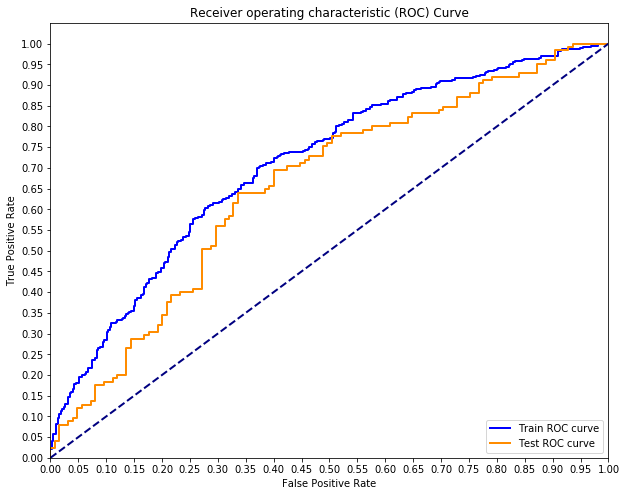

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

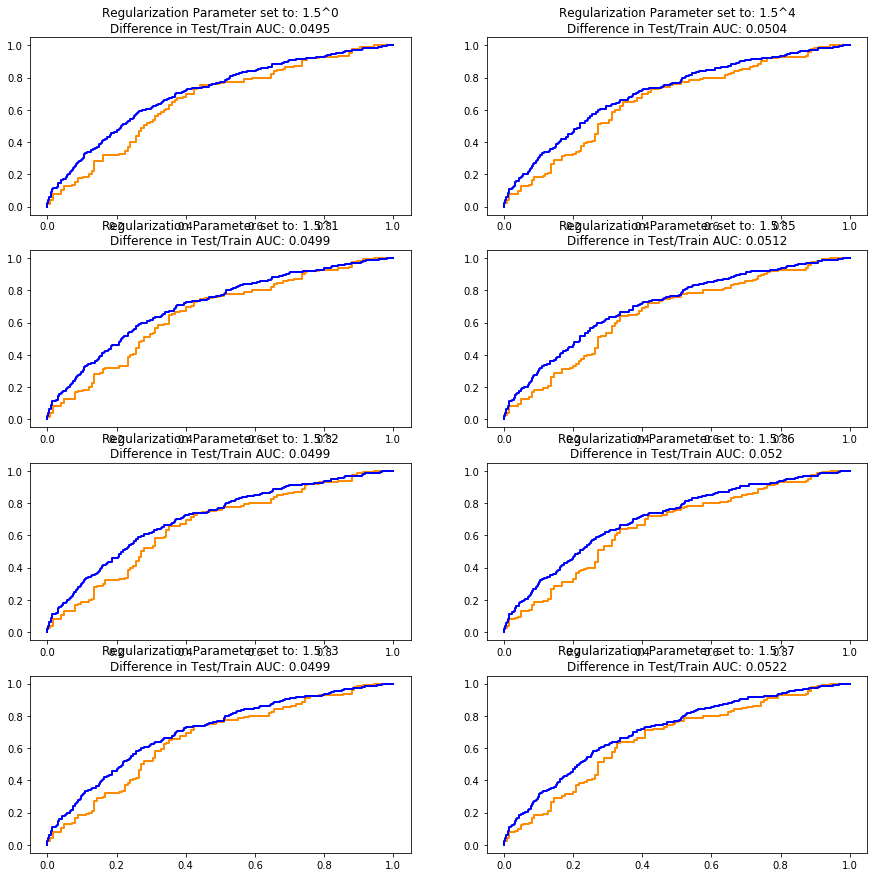

In [19]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))